# **Análisis estadístico y visualización de datos**

Este notebook presenta el análisis estadístico y las visualizaciones del dataset farmacéutico obtenido de Datos Abiertos Colombia, con el fin de identificar patrones relevantes para la gestión y el análisis en Ciencias Farmacéuticas.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# se importan las librerías necesarias para el análisis

In [9]:
df = pd.read_csv("/content/data_medicamentos_limpios.csv")

df.to_json("/content/data_medicamentos_limpios.json", orient="records" force_ascii=False)

# se carga el archivo csv que contiene los datos de medicamentos previamente depurados y el conjunto de datos se exporta a formato JSON

In [10]:
df = pd.read_json("/content/data_medicamentos_limpios.json")
df.head()

# primeras filas del df con el fin de verificar que los datos se hayan cargado correctamente y observar su estructura general

,principio_activo,unidad_de_dispensacion,concentracion,unidad_base,nombre_comercial,fabricante,precio_por_tableta,factoresprecio
0,Midazolam,Ampolla,Midazolam 15 mg,ml,Dormicum,Siegfried,11199.800000,Alto
1,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,3752.866667,Medio
2,Acido Valproico,Tableta,Divalproato Sodico 500 mg,mg,Valcote,Lafrancol,1777.266522,Medio
3,Fluoxetina,Capsula,Fluoxetina 20 mg,mg,Fluoxetina,Genfar,329.295281,Medio
4,Alopurinol,Tableta,Alopurinol 300 mg,mg,Alopurinol,Memphis,365.399678,Bajo


## Revisión datos nulos

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8189 entries, 0 to 8188
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   principio_activo        8189 non-null   object 
 1   unidad_de_dispensacion  8189 non-null   object 
 2   concentracion           8189 non-null   object 
 3   unidad_base             8189 non-null   object 
 4   nombre_comercial        8189 non-null   object 
 5   fabricante              8189 non-null   object 
 6   precio_por_tableta      8189 non-null   float64
 7   factoresprecio          8189 non-null   object 
dtypes: float64(1), object(7)
memory usage: 511.9+ KB


,0
principio_activo,0
unidad_de_dispensacion,0
concentracion,0
unidad_base,0
nombre_comercial,0
fabricante,0
precio_por_tableta,0
factoresprecio,0


## medidas de tendencia central y dispersión
La media y la mediana permiten identificar el comportamiento central del precio de los medicamentos, mientras que la moda indica el valor más frecuente en el conjunto de datos.




In [18]:
df['precio_por_tableta'].describe()

,precio_por_tableta
count,8189.000000
mean,6054.368951
std,8213.339368
min,50.046875
25%,856.000000
50%,2516.733333
75%,7642.946879
max,41000.000000


In [30]:
frecuencia_tipo = df['unidad_de_dispensacion'].value_counts()
frecuencia_tipo

,count
unidad_de_dispensacion,
Tableta,3869
Frasco,1450
Capsula,972
Tubo,413
Ampolla,409
Vial,348
Sobre,210
Bolsa,157
Jeringa Prellenada,71


In [31]:
frecuencia_tipo_pct = df['unidad_de_dispensacion'].value_counts(normalize=True) * 100
frecuencia_tipo_pct

,proportion
unidad_de_dispensacion,
Tableta,47.246306
Frasco,17.706680
Capsula,11.869581
Tubo,5.043351
Ampolla,4.994505
Vial,4.249603
Sobre,2.564416
Bolsa,1.917206
Jeringa Prellenada,0.867017


## Histograma

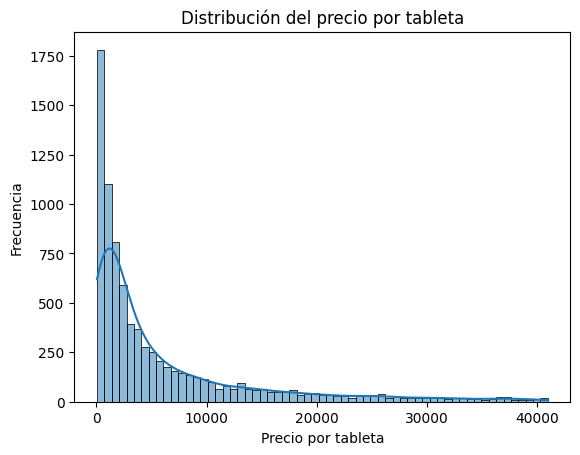

In [19]:
sns.histplot(df['precio_por_tableta'], kde=True)
plt.title('Distribución del precio por tableta')
plt.xlabel('Precio por tableta')
plt.ylabel('Frecuencia')
plt.show()

## Diagrama de cajas y bigotes

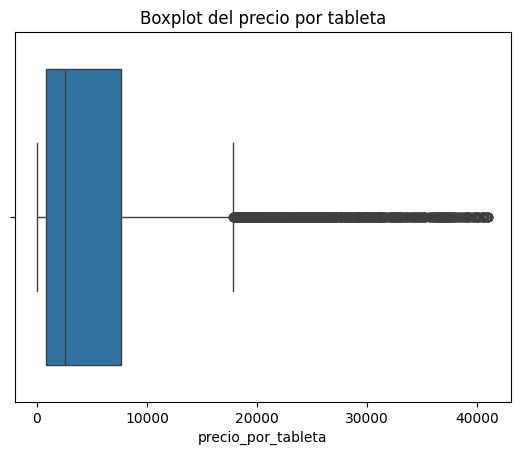

In [20]:
sns.boxplot(x=df['precio_por_tableta'])
plt.title('Boxplot del precio por tableta')
plt.show()

## Diagrama de distribucipon

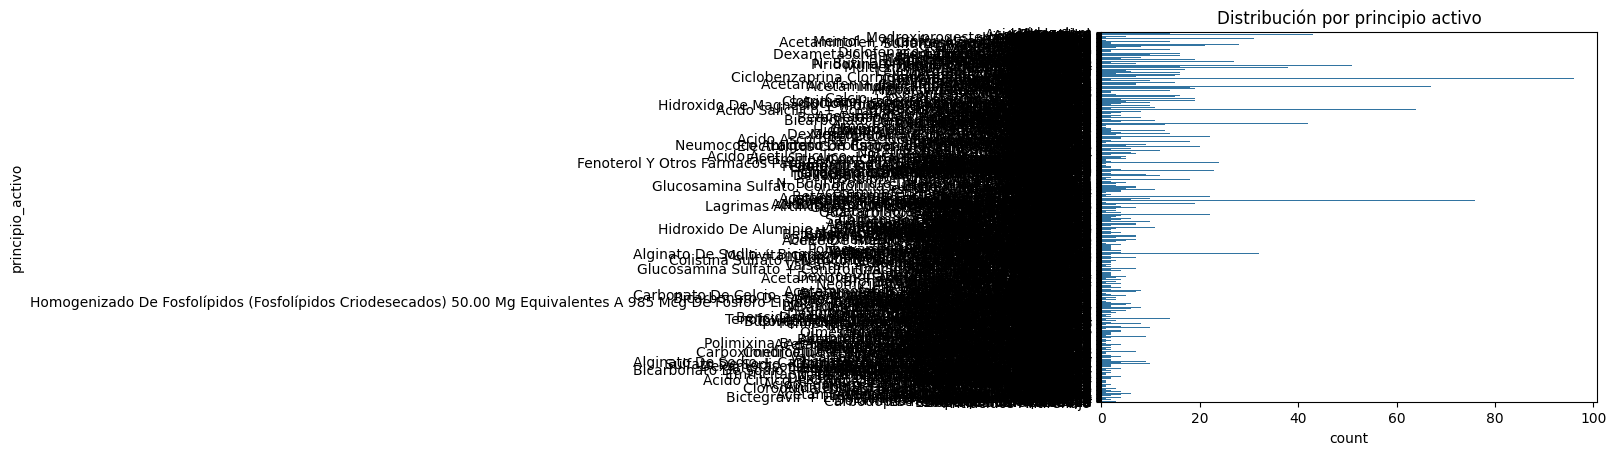

In [21]:
sns.countplot(y='principio_activo', data=df)
plt.title('Distribución por principio activo')
plt.show()
# visualización que permite comparar precios entre diferentes categorías de medicamentos para identificar diferencias significativas entre grupos

## Correlación
La variable "factoresprecio" corresponde a una categoría ordinal (Bajo, Medio, Alto).
Para evaluar su relación con el precio por tableta, se transformó a una escala numérica
ordinal (1, 2 y 3 respectivamente), permitiendo el cálculo de la correlación.


In [26]:
mapa_factores = {
    'Bajo': 1,
    'Medio': 2,
    'Alto': 3
}

df['factoresprecio_num'] = df['factoresprecio'].map(mapa_factores)

df[['factoresprecio', 'factoresprecio_num']].head()

,factoresprecio,factoresprecio_num
0,Alto,3
1,Medio,2
2,Medio,2
3,Medio,2
4,Bajo,1


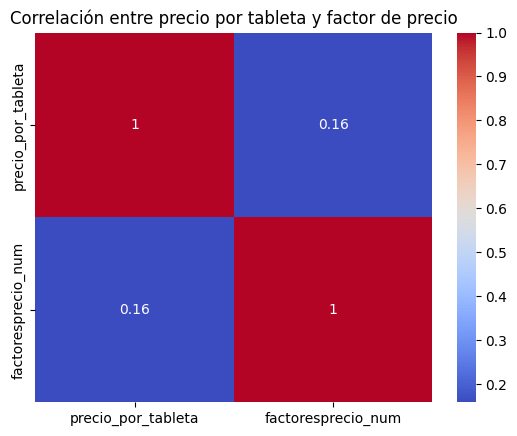

In [27]:
corr = df[['precio_por_tableta', 'factoresprecio_num']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre precio por tableta y factor de precio')
plt.show()